In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Features

In [2]:
# penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

# species: penguin species (Chinstrap, Adélie, or Gentoo)
# culmen_length_mm: culmen length (mm)
# culmen_depth_mm: culmen depth (mm)
# flipper_length_mm: flipper length (mm)
# body_mass_g: body mass (g)
# island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
# sex: penguin sex


In [3]:
# Import Libraries
import pandas as pd
#----------------------------------------------------
#reading data
data = pd.read_csv('penguins_size.csv')

data.describe()



,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


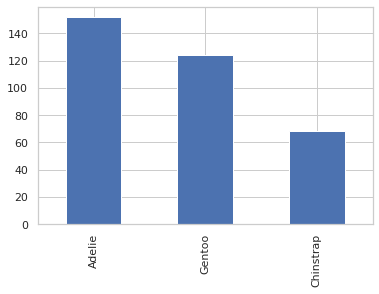

In [6]:
data['species'].value_counts().plot(kind = 'bar')

In [7]:
def count_unique_values(data):
    
    total = data.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(np.transpose(temp))
count_unique_values(data)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
Total,344,344,342,342,342,342,334
Uniques,3,3,164,80,55,94,3


In [8]:
# !pip install -U klib

In [9]:

import klib
import pandas as pd

df = pd.DataFrame(data)




GridSpec(6, 3)

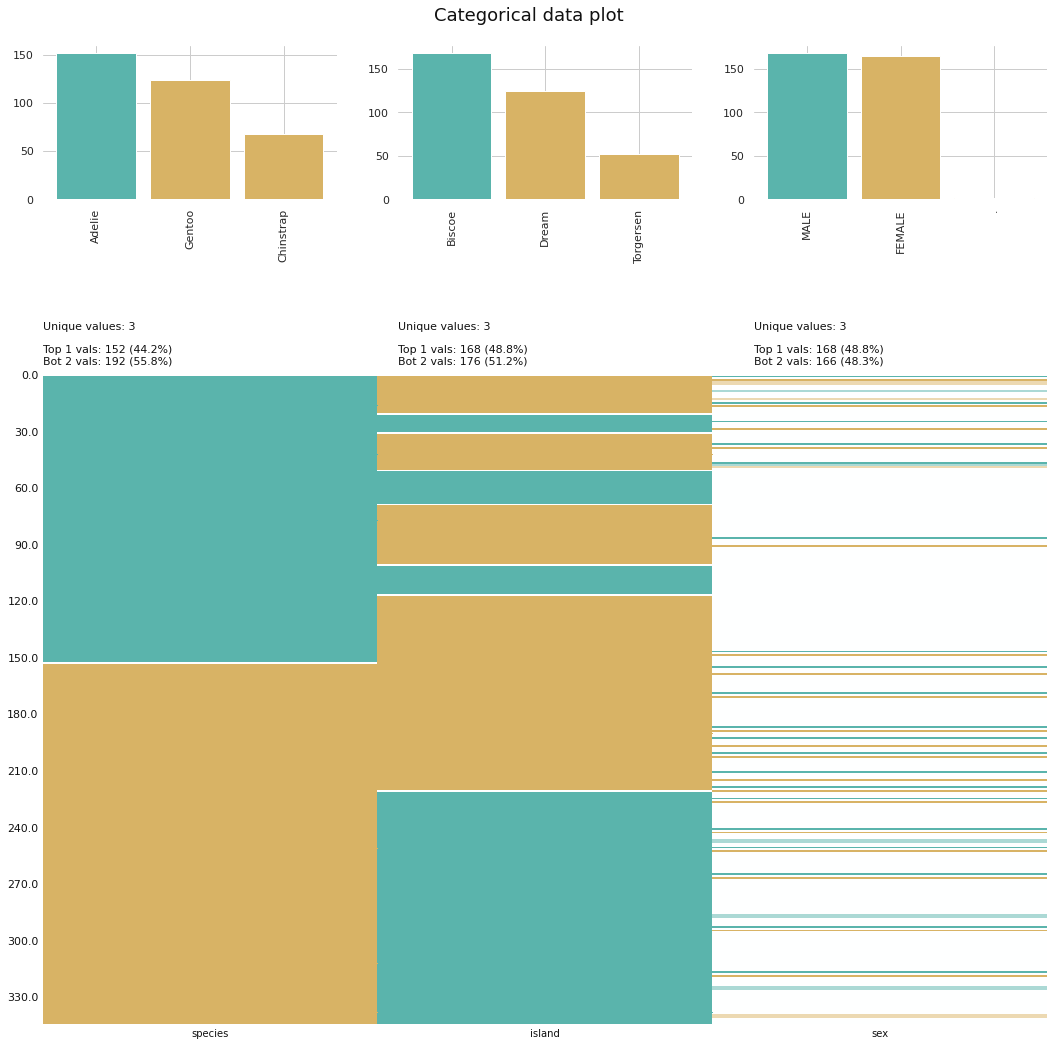

In [10]:
#visualization of the number and frequency of categorical features
klib.cat_plot(data)

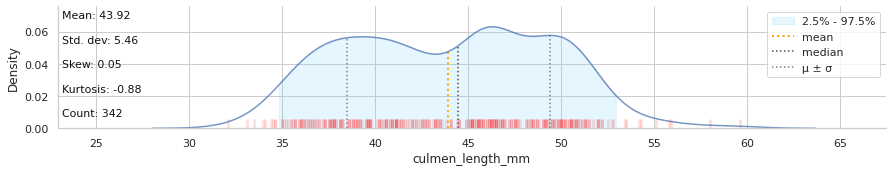

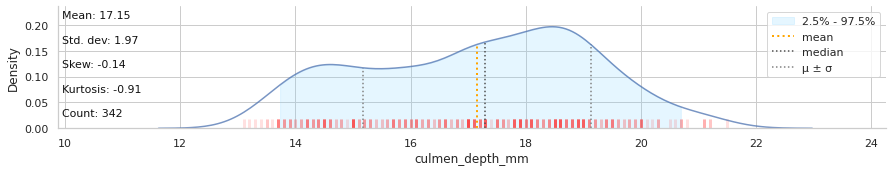

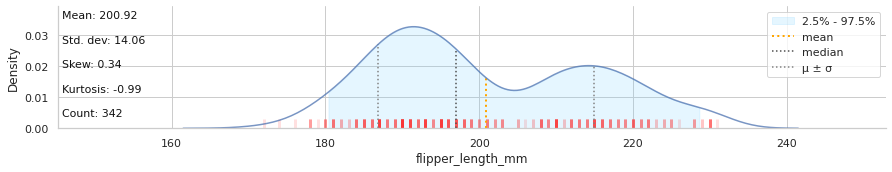

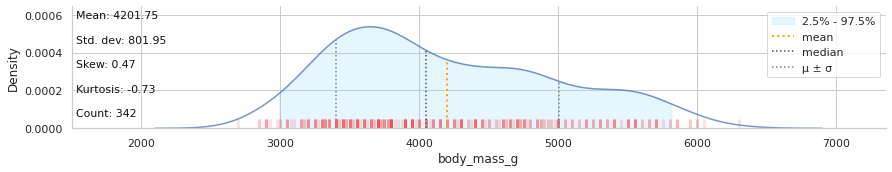

In [11]:
#distribution plot for every numeric feature
klib.dist_plot(data) 

In [12]:
klib.corr_mat(data)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.00,-0.24,0.66,0.60
culmen_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


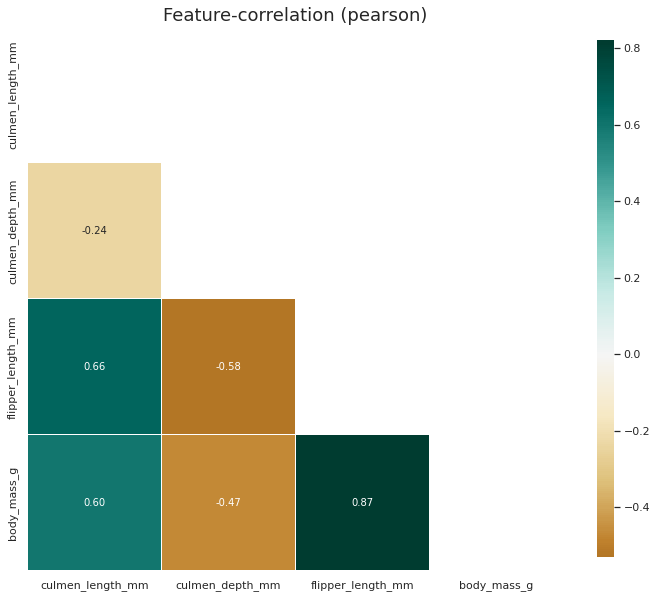

In [13]:
klib.corr_plot(data)

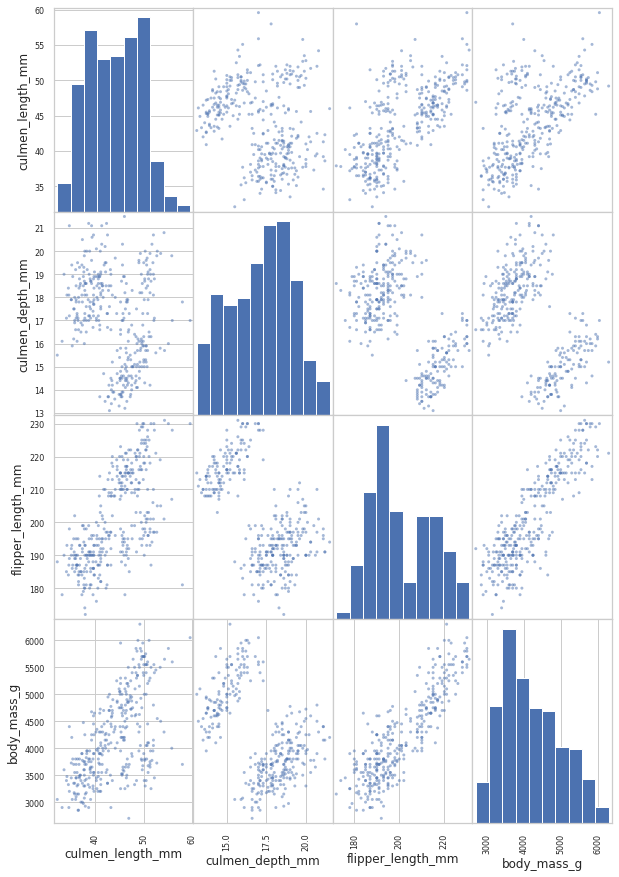

In [17]:
pd.plotting.scatter_matrix(data,figsize=(10, 15));

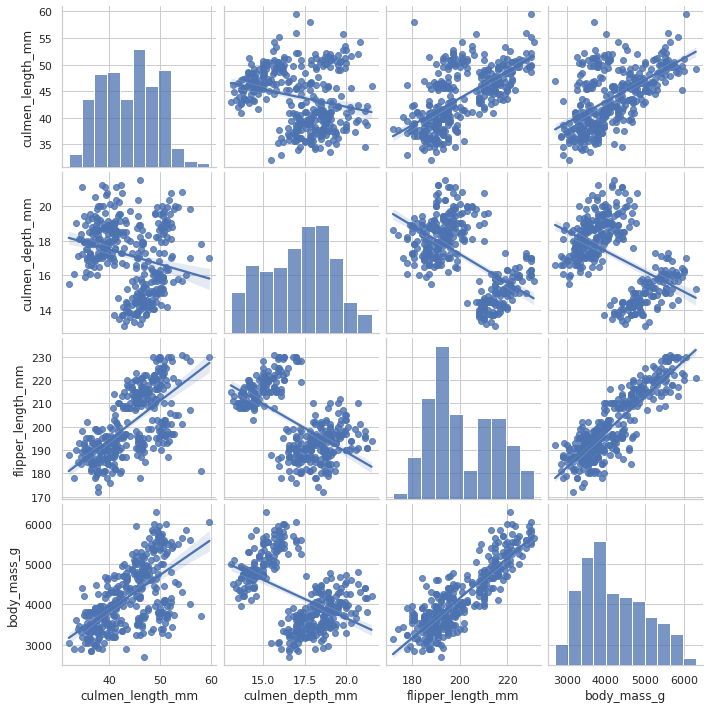

In [18]:
sns.pairplot(data, kind="reg")  

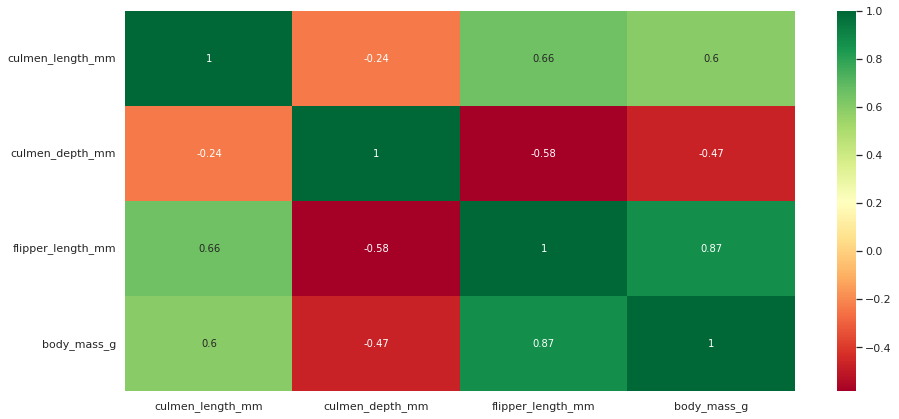

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,7))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

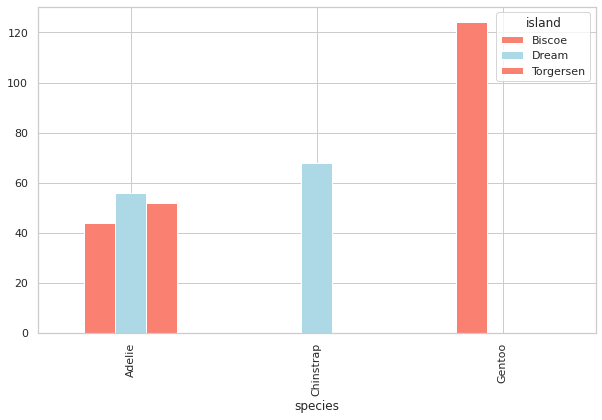

In [ ]:

# Create a plot
pd.crosstab(data.species, data.island).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

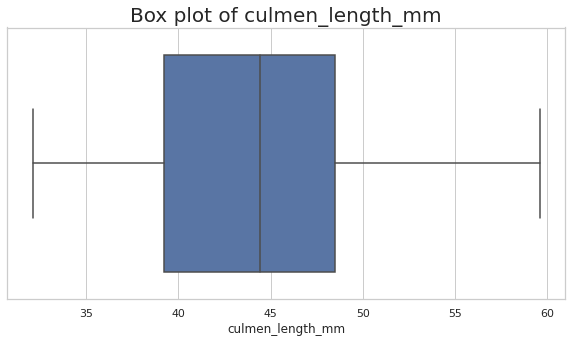

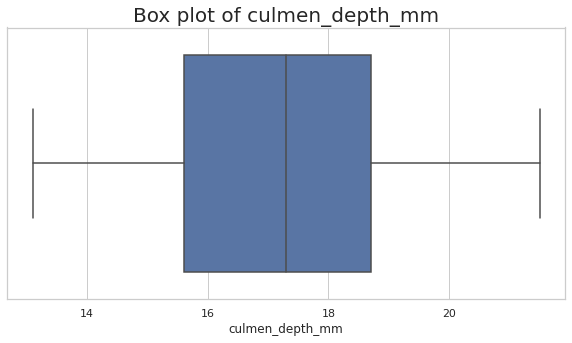

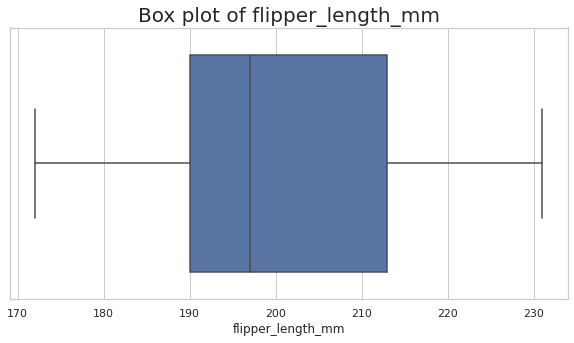

In [ ]:
numerical_features = data.select_dtypes(exclude = ["object"]).columns

### but numerical_features in usecols
df1 = pd.read_csv('penguins_size.csv',usecols=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

for column in df1.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df1[column])
    plt.title('Box plot of {}'.format(column), fontsize=20)

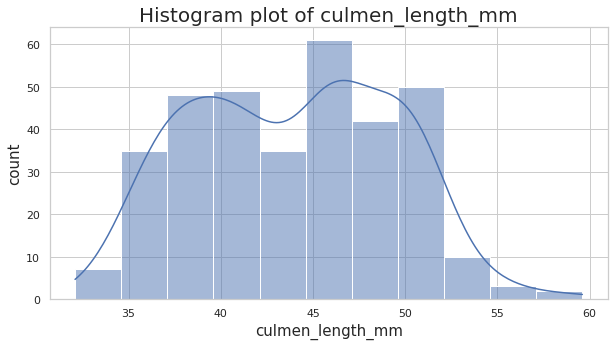

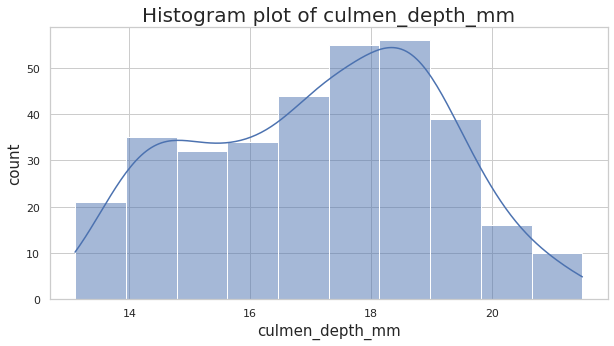

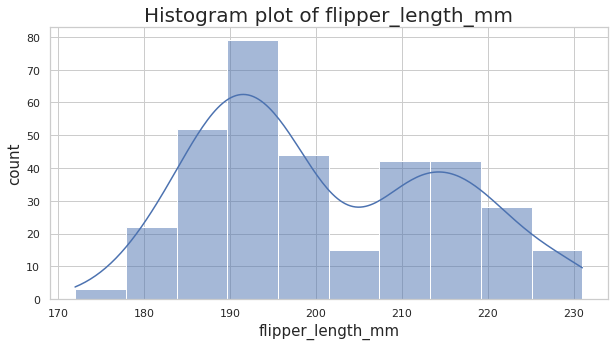

In [ ]:
#histplot all columns
for column in df1.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.histplot(df1[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title('Histogram plot of {}'.format(column), fontsize=20)

In [ ]:
# This will turn all of the string value into category values
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

#Finding Categorical Featurs
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'category' ]
print(categorical_features )

#convert all cols to numbers
cols= categorical_features  
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

['species', 'island', 'sex']


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
culmen_length_mm,2,0.005814
culmen_depth_mm,2,0.005814
flipper_length_mm,2,0.005814
body_mass_g,2,0.005814
species,0,0.000000
island,0,0.000000
sex,0,0.000000


In [ ]:
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            data[label] = content.fillna(content.median())

In [ ]:
#X Data
X = data.drop(['species'], axis=1, inplace=False)
print('X Data is \n' , X.head())
#print('X shape is ' , X.shape)

#y Data
y = data['species']
print('y Data is \n' , y.head())
#print('y shape is ' , y.shape)

X Data is 
    island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0       2             39.10             18.7              181.0       3750.0   
1       2             39.50             17.4              186.0       3800.0   
2       2             40.30             18.0              195.0       3250.0   
3       2             44.45             17.3              197.0       4050.0   
4       2             36.70             19.3              193.0       3450.0   

   sex  
0    2  
1    1  
2    1  
3    3  
4    1  
y Data is 
 0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


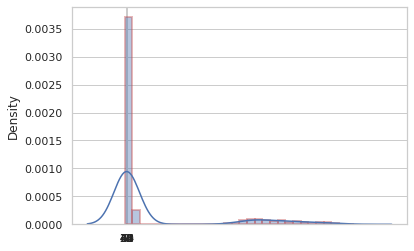

In [ ]:
sns.distplot(X, kde=True, bins=30,
             norm_hist=True,
             hist_kws=dict(edgecolor="r", linewidth=2))
plt.xticks(range(28, 70, 4))
plt.ylabel('Density')
plt.show()

In [ ]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#----------------------------------------------------

#----------------------------------------------------
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
print('X \n' , X[:10])
print('y \n' , y[:10])

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X 
 [[ 1.84407623 -0.88762183  0.78728939 -1.4205409  -0.56462526  0.8170105 ]
 [ 1.84407623 -0.8140366   0.12611415 -1.06348546 -0.50201047 -0.97312716]
 [ 1.84407623 -0.66686614  0.43127195 -0.42078568 -1.1907732  -0.97312716]
 [ 1.84407623  0.09658061  0.07525452 -0.2779635  -0.1889365   2.60714816]
 [ 1.84407623 -1.32913321  1.09244719 -0.56360785 -0.94031402 -0.97312716]
 [ 1.84407623 -0.85082921  1.75362242 -0.77784111 -0.68985485  0.8170105 ]
 [ 1.84407623 -0.92441444  0.32955268 -1.4205409  -0.72116224 -0.97312716]
 [ 1.84407623 -0.86922552  1.24502609 -0.42078568  0.59374842  0.8170105 ]
 [ 1.84407623 -1.8074372   0.48213158 -0.56360785 -0.90900662  2.60714816]
 [ 1.84407623 -0.35412892  1.55018389 -0.77784111  0.06152268  2.60714816]]
y 
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: species, dtype: int64
X_train shape is  (230, 6)
X_test shape is  (114, 6)
y_train shape is  (230,)
y_test shape is  (114,)


{'KNN': 0.9912280701754386, 'Logistic Regression': 0.9912280701754386, 'Random Forest': 0.9824561403508771, 'DecisionTree': 0.9736842105263158, 'SVC': 1.0, 'GaussianNB': 0.8245614035087719, 'GradientBoosting': 0.9649122807017544}


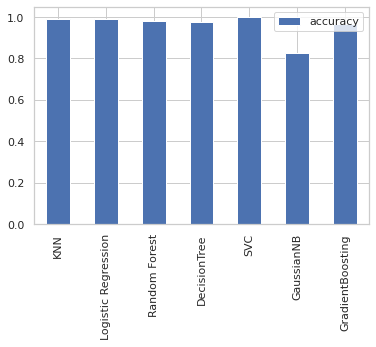

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "DecisionTree" :  DecisionTreeClassifier(),
          "SVC"          : SVC(),
          "GaussianNB"   : GaussianNB(),
          "GradientBoosting": GradientBoostingClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(44)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
print(np.array(model_scores))

#Model Comparison
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();


In [ ]:
#Import Libraries
from sklearn.linear_model import LogisticRegression
#----------------------------------------------------

#----------------------------------------------------
#Applying LogisticRegression Model 

'''
linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
#print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

LogisticRegressionModel Train Score is :  0.9956521739130435
LogisticRegressionModel Test Score is :  0.9912280701754386
LogisticRegressionModel Classes are :  [0 1 2]
LogisticRegressionModel No. of iteratios is :  [28]


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        46

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



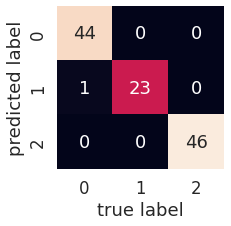

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)

In [ ]:
#Import Libraries
from sklearn.model_selection import cross_val_score
#----------------------------------------------------

#----------------------------------------------------
#Applying Cross Validate Score :  
'''
model_selection.cross_val_score(estimator,X,y=None,groups=None,scoring=None,cv=’warn’,n_jobs=None,verbose=0,
                                fit_params=None,pre_dispatch=‘2*n_jobs’,error_score=’raise-deprecating’)
'''

#  don't forget to define the model first !!!
CrossValidateScoreTrain = cross_val_score(LogisticRegressionModel, X_train, y_train, cv=3)
CrossValidateScoreTest = cross_val_score(LogisticRegressionModel, X_test, y_test, cv=3)

# Showing Results
print('Cross Validate Score for Training Set: \n', CrossValidateScoreTrain.mean())
print('Cross Validate Score for Testing Set: \n', CrossValidateScoreTest.mean())

Cross Validate Score for Training Set: 
 0.9869560264297106
Cross Validate Score for Testing Set: 
 0.9912280701754387


In [ ]:
print("The Real Value Is    :",np.array(y_test[:10]))
print("The Predicted Value Is :" ,y_pred[:10])

The Real Value Is    : [0 2 0 0 2 2 2 1 0 1]
The Predicted Value Is : [0 2 0 0 2 2 2 1 0 1]


In [ ]:
import pickle
# Save an extisting model to file
pickle.dump(LogisticRegressionModel, open("LogisticRegressionModel.pkl", "wb"))
# Load a saved model
loaded_pickle_model = pickle.load(open("LogisticRegressionModel.pkl", "rb"))
print(loaded_pickle_model.score(X_test,y_test))

0.9912280701754386
